In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Bikeshare Dataset and EDA

We want to predict the total number of bike rentals in a given day, based on attributes about the day. This forecasting model would be useful in planning the number of bikes that need to be available in the system on any given day, and also in monitoring traffic in the city. 

#### Description of variables


- season (1 = spring, 2 = summer, 3 = fall, 4 = winter)
- month (1 through 12, with 1 = January)
- holiday (1 = holiday, 0 = otherwise)
- day_of_week (0 through 6, with 0 denoting Sunday)
- workingday (1 = the day is neither a holiday or weekend, 0 = otherwise)
- weather:
   - 1: Clear, Few clouds, Partly cloudy
   - 2: Mist + Cloudy,Mist + Broken clouds, Mist + Few Clouds, Mist.
   - 3: Light Snow, Light Rain + Thunderstorm + Scattered Clouds, Light Rain + Scattered Clouds
   - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist,Snow + Fog
- temp (temperature in Celsius)
- atemp (apparent, or relative outdoor, or real feel temperature, in Celsius)
- humidity (relative humidity)
- windspeed (wind speed)
- count (response variable i.e. total number of bike rentals in a day)


#### Load BikeShare dataset and drop unnecessary columns

In [2]:
bikeshare = pd.read_csv('/Users/macuser/Downloads/bikeshare.csv').drop(columns=['Unnamed: 0'])
print("Length of Dataset: ", len(bikeshare))
display(bikeshare.head())

Length of Dataset:  731


,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
0,2.0,5.0,0.0,2.0,1.0,2.0,24.0,26.0,76.5833,0.118167,6073.0
1,4.0,12.0,0.0,2.0,1.0,1.0,15.0,19.0,73.3750,0.174129,6606.0
2,2.0,6.0,0.0,4.0,1.0,1.0,26.0,28.0,56.9583,0.253733,7363.0
3,4.0,12.0,0.0,0.0,0.0,1.0,0.0,4.0,58.6250,0.169779,2431.0
4,3.0,9.0,0.0,3.0,1.0,3.0,23.0,23.0,91.7083,0.097021,1996.0


In [3]:
display(bikeshare.describe())

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,2.997264,0.683995,1.395349,16.229822,18.885089,62.789406,0.190486,4552.354309
std,1.110807,3.451913,0.167155,2.004787,0.465233,0.544894,11.531101,10.278475,14.242910,0.077498,2021.971365
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-11.000000,-6.000000,0.000000,0.022392,22.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,10.000000,52.000000,0.134950,3116.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,16.000000,20.000000,62.666700,0.180975,4575.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.000000,27.000000,73.020850,0.233214,6048.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,39.000000,42.000000,97.250000,0.507463,10045.000000


#### Using Groupby function to look at mean stats aggregated by month

In [4]:
bikeshare.groupby('month').mean()

,season,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
month,,,,,,,,,,
1.0,1.000000,0.048387,2.870968,0.645161,1.419355,-0.080645,4.145161,58.582827,0.206303,2498.306452
2.0,1.000000,0.035088,3.000000,0.684211,1.368421,3.912281,7.807018,56.746468,0.215684,2824.315789
3.0,1.354839,0.000000,3.096774,0.725806,1.451613,9.580645,13.080645,58.847503,0.222699,3822.241935
4.0,2.000000,0.033333,3.000000,0.666667,1.416667,14.583333,17.783333,58.806312,0.234482,4348.600000
5.0,2.000000,0.032258,2.903226,0.693548,1.403226,22.532258,24.661290,68.895831,0.182989,5268.790323
6.0,2.333333,0.000000,3.100000,0.716667,1.233333,28.150000,29.216667,57.580552,0.185420,5547.033333
7.0,3.000000,0.032258,2.935484,0.661290,1.193548,32.580645,33.338710,59.787632,0.166059,5563.677419
8.0,3.000000,0.000000,3.000000,0.741935,1.306452,29.629032,30.096774,63.773010,0.172918,5584.887097
9.0,3.266667,0.033333,3.050000,0.666667,1.500000,23.850000,25.466667,71.471437,0.165945,5653.316667


#### Plotting variation of count with month. 

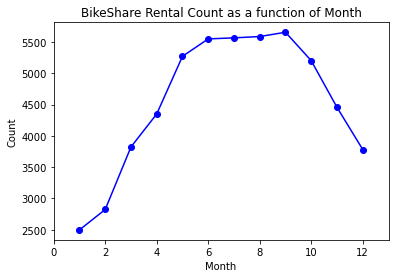

In [5]:
plt.figure(figsize=[6,4])
plt.plot(bikeshare.groupby('month').mean()['count'],'-ob')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('BikeShare Rental Count as a function of Month')
plt.xlim([0,13])
plt.show()

#### Plotting temp and a_temp to see any differences. 

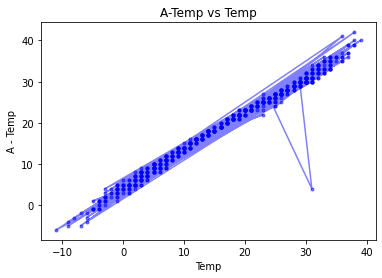

In [7]:
plt.plot(bikeshare['temp'], bikeshare['atemp'],'.-b', alpha = 0.5)
plt.xlabel('Temp')
plt.ylabel('A - Temp')
plt.title ('A-Temp vs Temp')
plt.show()

Given the 'zig-zag' changes of the plot across the scale (matplotlib is trying to connect the points sequentiall from top), we need to sort the 'temp' values.

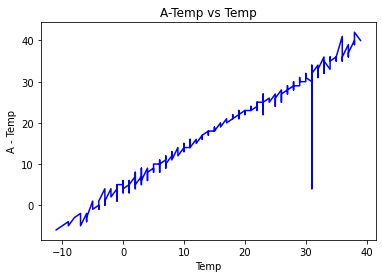

In [8]:
# Sorting
new = bikeshare.sort_values(['temp'])

plt.plot(new['temp'], new['atemp'],'-b',alpha=1)
plt.xlabel('Temp')
plt.ylabel('A - Temp')
plt.title('A-Temp vs Temp')
plt.show()

In [16]:
display(new.head(10))

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
176,1.0,1.0,0.0,6.0,0.0,1.0,-11.0,-6.0,40.0000,0.171970,981.0
367,1.0,1.0,0.0,1.0,1.0,1.0,-9.0,-4.0,49.1739,0.158330,1416.0
265,1.0,1.0,0.0,0.0,0.0,1.0,-9.0,-5.0,43.6522,0.246600,986.0
346,1.0,1.0,0.0,3.0,1.0,2.0,-8.0,-3.0,41.4583,0.184700,2368.0
612,1.0,2.0,0.0,3.0,1.0,2.0,-7.0,-2.0,49.4783,0.188839,1605.0
82,1.0,2.0,0.0,0.0,0.0,1.0,-7.0,-5.0,46.4583,0.409212,1529.0
475,1.0,2.0,0.0,4.0,1.0,1.0,-6.0,-2.0,43.7391,0.221935,1538.0
343,1.0,1.0,0.0,0.0,0.0,1.0,-6.0,-4.0,43.4167,0.361950,822.0
270,1.0,1.0,0.0,2.0,1.0,1.0,-6.0,-3.0,44.1250,0.365671,2236.0
457,1.0,1.0,0.0,5.0,1.0,1.0,-5.0,1.0,53.7826,0.126548,6079.0


As we can see from the dataset, there are multiple 'atemp' values for each 'temp' value, and hence it bounces around the same x-value. We need to sort both axes simultaneously. 

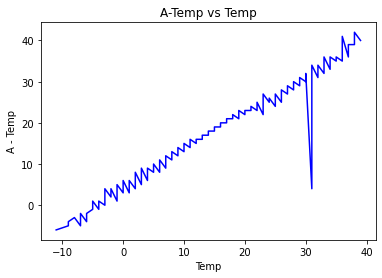

In [17]:
new = bikeshare.sort_values(['temp','atemp'])
plt.plot(new['temp'], new['atemp'],'-b')
plt.xlabel('Temp')
plt.ylabel('A - Temp')
plt.title('A-Temp vs Temp')
plt.show()

The plot reveals an anomaly in the data at a point where 'temp' is greater than 30 and 'atemp' is less than 10.

#### All rows in dataframe where temp > 30 and atemp < 10

In [18]:
display(bikeshare[(bikeshare['temp'] > 30) & (bikeshare['atemp'] < 10)])

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
188,3.0,8.0,0.0,5.0,1.0,1.0,31.0,4.0,57.0833,0.231354,7148.0


Anomaly is detected at datapoint 188, where it is not linearly related. Hence, we drop this single datapoint.

In [19]:
bikeshare = bikeshare.drop([188])

In [20]:
display(bikeshare[(bikeshare['temp'] > 30) & (bikeshare['atemp'] < 10)])

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count


## Split Data into training set and test set

Create function that will randomly split data into a 70-30 split (70% train set, 30% test set)

In [22]:
#use sklearn's train_test_split

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(bikeshare, test_size=0.30, random_state=42)

print("Length of Training Set = ",len(train_data))
print("Length of Test Set = ",len(test_data))

Length of Training Set =  511
Length of Test Set =  219


#### Check ratio of number of points in training set to number of points in testing set to see if data was split correctly

In [23]:
print('ratio of training data : ',100*len(train_data)/len(bikeshare))
print('ratio of testing data : ',100*len(test_data)/len(bikeshare))

ratio of training data :  70.0
ratio of testing data :  30.0


# kNN Regression

## Using sklearn to implement kNN

In [26]:
from sklearn.neighbors import KNeighborsRegressor

# kNN parameter:
k = 5

# Classifier Object:
neighbors = KNeighborsRegressor(n_neighbors=k)

# Fit model using x_train as training_data and y_train as target values:
neighbors.fit(train_data[['temp']], train_data['count'])

# Retrieve predictions:
prediction_knn = neighbors.predict(test_data[['temp']])

# Retrieve mean accuracy of given test data and labels (R^2 value)
r2_train = neighbors.score(train_data[['temp']], train_data['count'])
r2_test = neighbors.score(test_data[['temp']], test_data['count'])
print("Length of Test Data:", len(test_data['count']))
print("R^2 Score of kNN on training set:", r2_train)
print("R^2 Score of kNN on testing set:", r2_test)

Length of Test Data: 219
R^2 Score of kNN on training set: 0.25177711125697033
R^2 Score of kNN on testing set: 0.08705155678927101


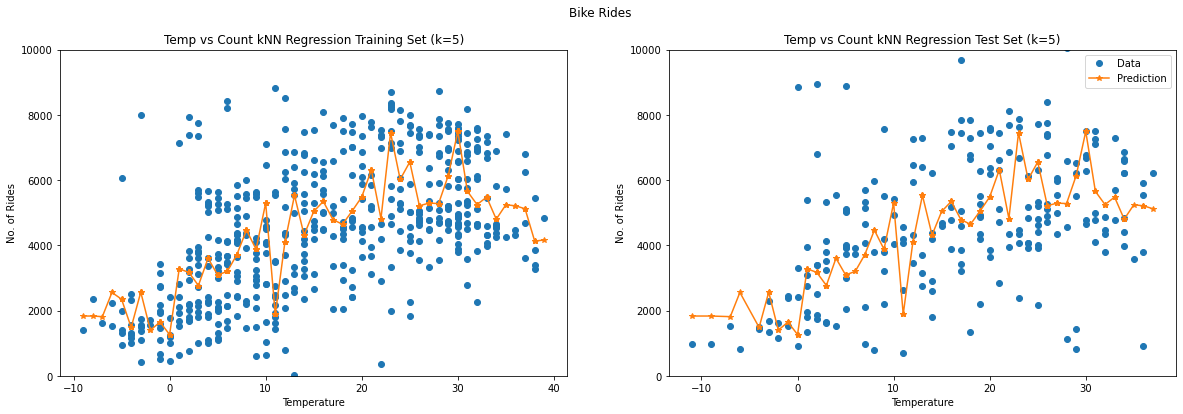

In [28]:
# SubPlots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
axes[0].set_ylim([0,10000])
axes[0].plot(train_data['temp'], train_data['count'], 'o', label = 'Data')

sorted_temp = train_data.sort_values(['temp'])
prediction_knn = neighbors.predict(sorted_temp[['temp']])

axes[0].plot(sorted_temp['temp'], prediction_knn, '*-', label = 'Prediction')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('No. of Rides')
axes[0].set_title("Temp vs Count kNN Regression Training Set (k={})".format(k))
axes[0].legend

axes[1].set_ylim([0,10000])
axes[1].plot(test_data['temp'], test_data['count'],'o', label = 'Data')

sorted_temp = test_data.sort_values(['temp'])
prediction_knn = neighbors.predict(sorted_temp[['temp']])

axes[1].plot(sorted_temp['temp'], prediction_knn, '*-', label = 'Prediction')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('No. of Rides')
axes[1].set_title("Temp vs Count kNN Regression Test Set (k={})".format(k))
axes[1].legend()

fig.suptitle("Bike Rides");

# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
import statsmodels.api as sm

# Split Data into X,Y
x_train, y_train = train_data['temp'], train_data['count']
x_test, y_test = test_data['temp'], test_data['count']

# Add constant
x_train_ca = sm.add_constant(x_train)
x_test_ca = sm.add_constant(x_test)

#### Fitting a Linear Regression (OLS) model using statsmodels and printing out coefficients

In [31]:
model = sm.OLS(y_train, x_train_ca)
results = model.fit()
print(results.params)

const    2977.527482
temp       94.629987
dtype: float64


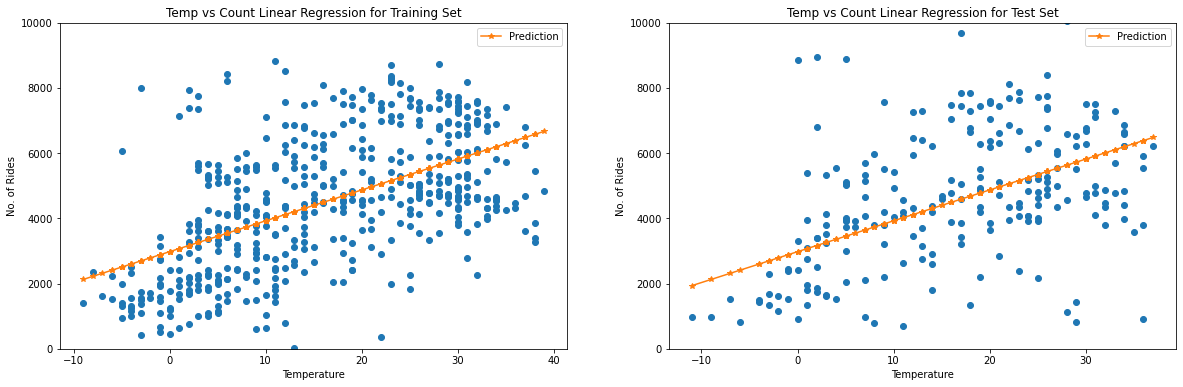

In [32]:
# Plotting our model
fig, axes = plt.subplots(1,2,figsize=(20,6))
axes = axes.ravel()

axes[0].plot(x_train, y_train, 'o')
sorted_temp = train_data.sort_values(['temp'])
prediction_lr = results.predict(sm.add_constant(sorted_temp[['temp']]))
axes[0].plot(sorted_temp['temp'], prediction_lr, '*-', label = 'Prediction')
axes[0].set_title('Temp vs Count Linear Regression for Training Set')

axes[1].plot(x_test, y_test, 'o')
sorted_temp = test_data.sort_values(['temp'])
prediction_lr = results.predict(sm.add_constant(sorted_temp[['temp']]))
axes[1].plot(sorted_temp['temp'], prediction_lr, '*-', label = 'Prediction')
axes[1].set_title('Temp vs Count Linear Regression for Test Set')

for i, ax in enumerate(axes):
    ax.set_ylim(0,10000)
    ax.set_xlabel('Temperature')
    ax.set_ylabel('No. of Rides')
    ax.legend()

In [34]:
# Metrics, Performance Evaluation and Helpful functions

from sklearn import metrics

# Using TEST set to compute mean squared error:
print("R^2 Score for Linear Regression (Training):", metrics.r2_score(y_train, results.predict(x_train_ca)))
print("R^2 Score for Linear Regression (Testing) :", metrics.r2_score(y_test, results.predict(x_test_ca)))

R^2 Score for Linear Regression (Training): 0.29634842804618666
R^2 Score for Linear Regression (Testing) : 0.18898167147912737


In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     214.4
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           9.18e-41
Time:                        20:07:00   Log-Likelihood:                -4522.2
No. Observations:                 511   AIC:                             9048.
Df Residuals:                     509   BIC:                             9057.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2977.5275    127.983     23.265      0.000    2726.088    3228.967
temp          94.6300      6.463     14.641      0.000      81.932     107.328
==============================================================================
Omnibus:                       13.052   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.710
Skew:                           0.397   Prob(JB):                      0.00105
Kurtosis:                       2.888   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Confidence Intervals

In [36]:
# confidence interval model using Stats Model Summary
thresh = 0.05
intervals = results.conf_int(alpha=thresh)

# Renaming column names
first_col = str(thresh/2*100)+"%"
second_col = str((1-thresh/2)*100)+"%"
intervals = intervals.rename(columns={0:first_col,1:second_col})
display(intervals)

,2.5%,97.5%
const,2726.088195,3228.966770
temp,81.932160,107.327814
